In [3]:
#importando todos os pacotes necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [5]:
#dataset disponivel no sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#
from sklearn.datasets import load_boston
dt_boston=load_boston()
type(dt_boston)

sklearn.utils.Bunch

In [6]:
#analisando as dimensões de um df
dt_boston.data.shape

(506, 13)

In [7]:
#imprimindo as descrições
print(dt_boston.DESCR)
#as variáveis preditoras são as que vão formar o seu modelo
#target é a variável de interesse
#Nesse caso temos 13 preditoras (x) e uma target (y)
#A partit das caracteristicas vamos prever o preço

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
print(dt_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
#convertendo para um dataframe do pandas
df_boston=pd.DataFrame(dt_boston.data)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#alterando nome das colunas
df_boston.columns=dt_boston.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#CRIM taxa de criminalidade per capita por cidade
#ZN proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados
#INDUS proporção de acres comerciais não comerciais por cidade
#CHAS variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário
#NOX concentração de óxidos nítricos
#RM número médio de quartos por habitação
#AGE proporção de unidades ocupadas pelo proprietário construídas antes de 1940
#DIS distâncias ponderadas para cinco centros de emprego em Bosto
#RAD Índice RAD de acessibilidade às rodovias radiais
#TAX imposto sobre a propriedade de valor total por US $ 10.000
#PTRATIO Proporção aluno-professor PTRATIO por cidad
#B 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade
#LSTAT % menor status da população

#Variavel de interesse, media de preços das casas

In [20]:
# é o array de preços do dataset
dt_boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [21]:
#incluindo no dataframe o preço
df_boston['PRICE']=dt_boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
#prevendo o peço das casas
#y preço das casas
#x demais variáveis
from sklearn.linear_model import LinearRegression

In [36]:
y = df_boston.PRICE
x = df_boston.drop('PRICE',axis=1)

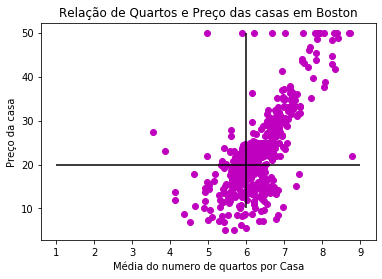

In [71]:
#analisando a relação entre o preço e n de quartos
plt.scatter(df_boston.RM,y, color='m')
plt.hlines(y = 20, xmin = 1, xmax = 9)
plt.vlines(x = 6, ymin = 10, ymax = 50)
plt.xlabel("Média do numero de quartos por Casa")
plt.ylabel('Preço da casa')
plt.title('Relação de Quartos e Preço das casas em Boston')
plt.show()

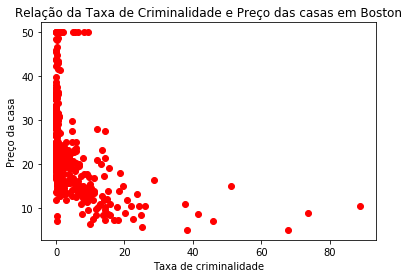

In [39]:
#analisando a relação entre o preço e a taxa de criminalidade
plt.scatter(df_boston.CRIM,y, color='r')
plt.xlabel("Taxa de criminalidade")
plt.ylabel('Preço da casa')
plt.title('Relação da Taxa de Criminalidade e Preço das casas em Boston')
plt.show()

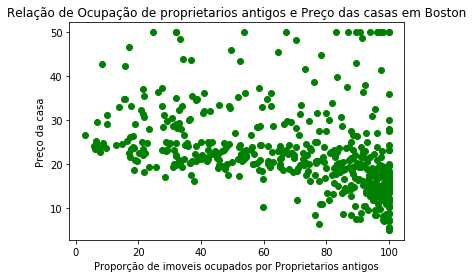

In [40]:
#analisando a relação entre o preço e proprietarios antigos
plt.scatter(df_boston.AGE,y, color='g')
plt.xlabel("Proporção de imoveis ocupados por Proprietarios antigos")
plt.ylabel('Preço da casa')
plt.title('Relação de Ocupação de proprietarios antigos e Preço das casas em Boston')
plt.show()

In [41]:
regressao=LinearRegression()
type(regressao)

sklearn.linear_model.base.LinearRegression

In [43]:
#treinando o modelo pelo método fit
regressao.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#coeficiente
print(regressao.intercept_)

36.459488385089855


In [47]:
#realizando previsão considerando todos os valores considerando x
regressao.predict(x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

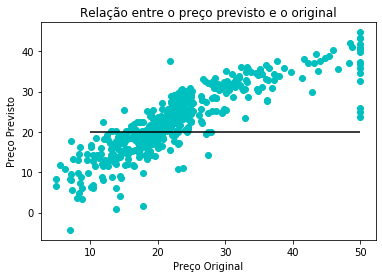

In [59]:
#mostrando relação entre o preço original e o preço previsto
plt.scatter(df_boston.PRICE, regressao.predict(x),color ='c')
plt.hlines(y = 20, xmin = 10, xmax = 50)
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Relação entre o preço previsto e o original')
plt.show()

In [60]:
#calculando a média do erro
media_erro=np.mean((df_boston.PRICE - regressao.predict(x))**2 )
media_erro

21.894831181729227

In [72]:
#dividindo o modelo em treino e teste
#Função train_test_split promove a divisão randomica dos dados
from sklearn.model_selection import train_test_split

In [75]:
#dividindo os dados
#test size = 0.30 = 70% de treino, 30% teste
x_treino,x_teste, y_treino, y_teste= train_test_split(x,df_boston.PRICE, test_size=0.30, 
                                                      random_state =5)

In [77]:
print(x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [78]:
regr=LinearRegression()

In [79]:
regr.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#definindo treino e teste
pred_treino= regr.predict(x_treino)
pred_teste= regr.predict(x_teste)

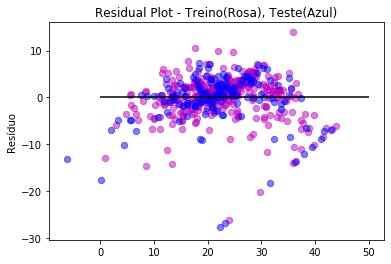

In [87]:
#visualizando residuos
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = 'm', s = 40, alpha = 0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = 'b', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Rosa), Teste(Azul)")
plt.show()